# Logistic Regression

In [141]:
# Loading libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [142]:
dataset = pd.read_csv("zomato.csv", encoding='latin-1')

In [159]:
dataset.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [144]:
dataset2 = dataset.drop(columns=['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Address', 'Cuisines', 'Currency','Has Table booking', 'Has Online delivery','Is delivering now','Switch to order menu', 'Rating color', 'Rating text'])

In [145]:
y=dataset2["Aggregate rating"]
x=dataset2.drop(["Aggregate rating"],axis=1)
print("Shape of y:",y.shape)
print("Shape of x:",x.shape)

Shape of y: (9551,)
Shape of x: (9551, 7)


In [146]:
# Spliting the dataset into Train set and Test Set
from sklearn.model_selection import train_test_split

In [147]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [148]:
x_train.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Votes
2629,18421232,1,77.155222,28.541052,500,2,44
4685,312098,1,77.130681,28.648991,500,2,10
6159,18372299,1,77.284238,28.618546,600,2,0
9197,3800021,1,72.794136,21.186608,800,3,226
5605,18449664,1,77.218800,28.709364,200,1,0


In [149]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()

In [151]:
x_train = scaler.fit_transform(x_train)

In [152]:
x_test = scaler.transform(x_test)

In [153]:
# Loading the model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [154]:
reg.fit(x_train, y_train)

LinearRegression()

In [155]:
pred = reg.predict(x_test)

<AxesSubplot: xlabel='Aggregate rating', ylabel='Density'>

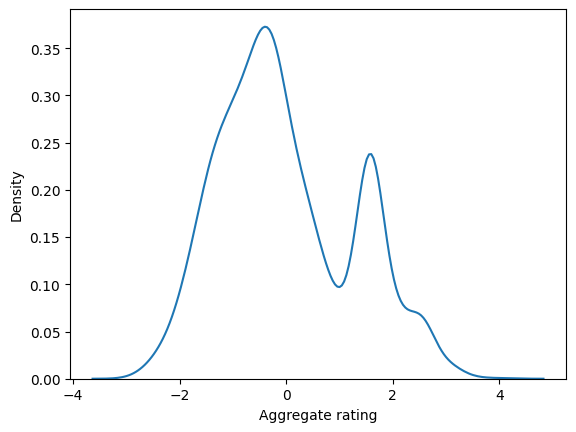

In [156]:
sns.kdeplot(pred - y_test)

In [157]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [158]:
print("Train Error: ",np.sqrt(mean_squared_error(y_train,reg.predict(x_train))))

y_pred_linear=reg.predict(x_test)

linear_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_linear))

print("Test Error: ",linear_RMSE)
print("---"*108)
print("R2 SCORE:",reg.score(x,y))

Train Error:  1.2280829248072611
Test Error:  1.242746750479656
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
R2 SCORE: -14773736105975.057


C:\Users\arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
